In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target = 미국에 사는 대학 진학을 위한 사람들을 위해 주별 사립과 공립(주 안에 살고.주 밖에 살고 있는 사람) 평균 비용

- State = 주
- Type = 공립(주 안, 주 밖)/사립
- Length = 2 / 4 year
- Expense = Fees/Tuition // Room/Board
- Value = 값

In [111]:
admission = pd.read_csv('./dataset/admission.csv')

In [112]:
admission('Wa')

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [157]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [160]:
admission.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [158]:
admission['State'].nunique()

51

In [292]:
admission['State'].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [159]:
admission['Year'].value_counts()

2013    403
2014    403
2015    403
2016    403
2017    401
2018    398
2019    396
2020    396
2021    345
Name: Year, dtype: int64

<AxesSubplot:>

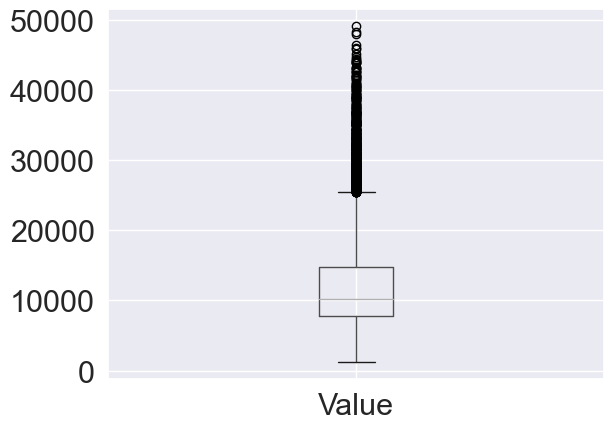

In [291]:
admission.boxplot(column=['Value'])

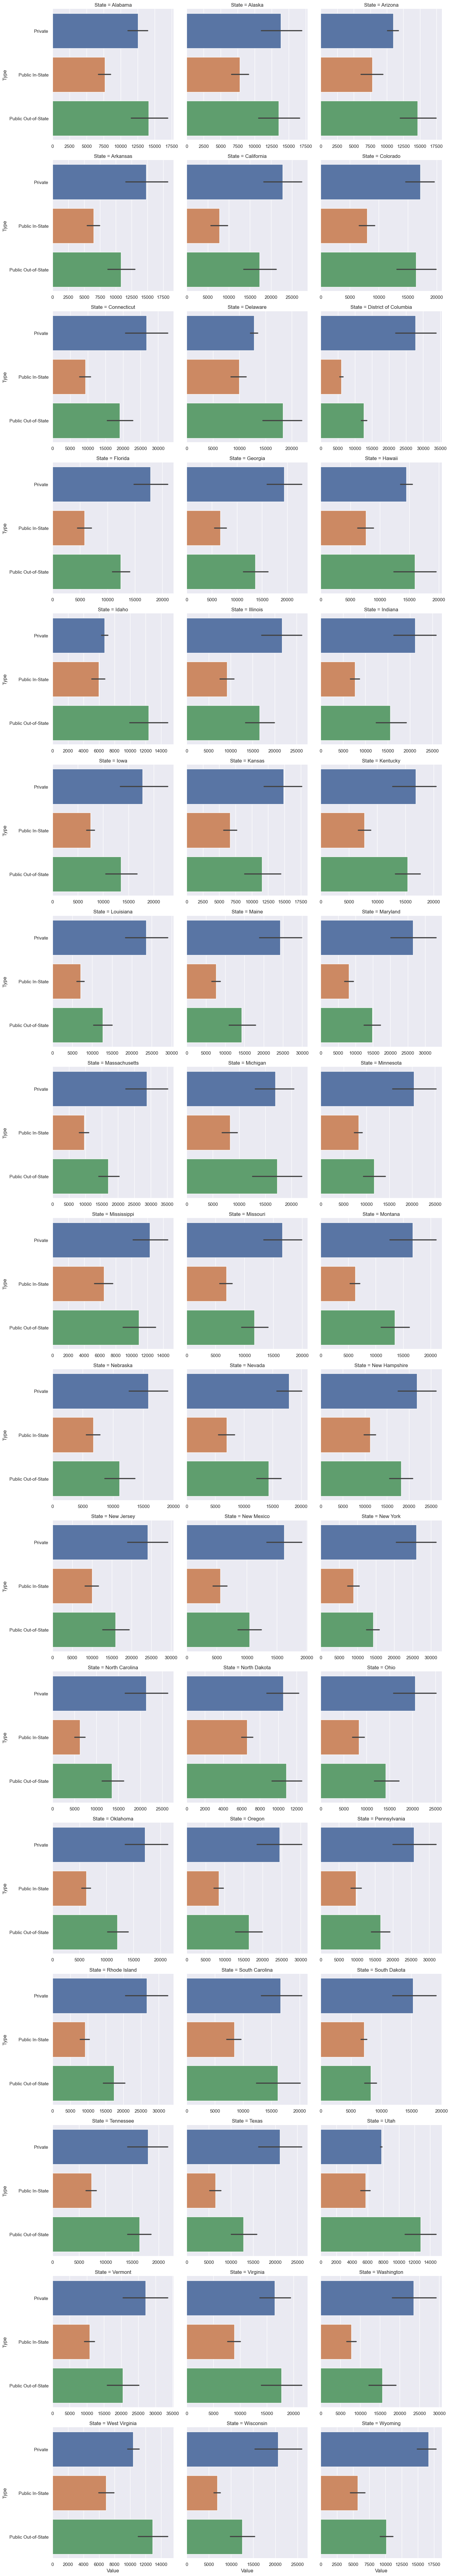

In [253]:
sns.catplot(data=admission, y="Type", x="Value",
            col='State', kind='bar', col_wrap=3, sharex=False)

In [246]:
df_1 = admission.groupby(by=['State']).mean().drop('Year',axis=1)

<AxesSubplot:xlabel='Value', ylabel='State'>

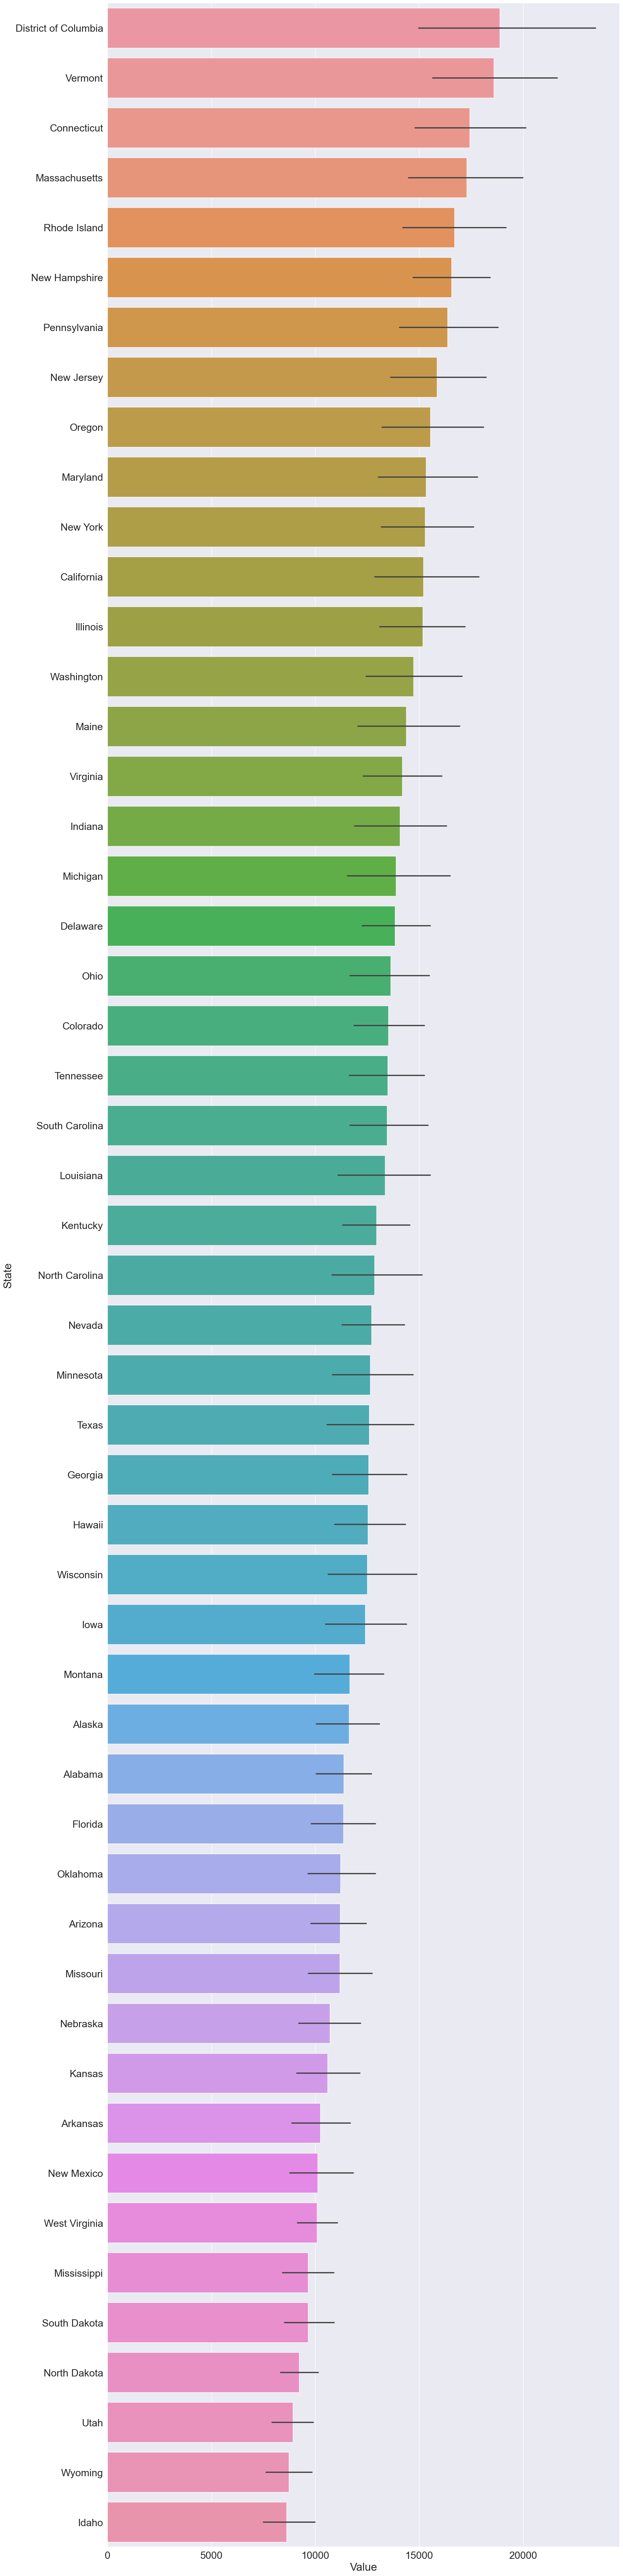

In [254]:
sns.set(font_scale = 2)
plt.figure(figsize=(20,100))
sns.barplot(data=admission, x='Value', y='State',order=a)

# 모델 선택

In [281]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [259]:
feature = admission.drop('Value',axis=1)
drop_y = admission['Value']

In [261]:
encoding = pd.get_dummies(feature)

In [286]:
X = encoding
y = drop_y

In [288]:
X.shape,y.shape

((3548, 59), (3548,))

In [279]:
# Linear
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
model.score(X_test,y_test)

0.6921407790734065

In [289]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)
y_test_predict = model.predict(X_test)
model.score(X_test,y_test)

0.004225352112676056